In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 10 03:49:07 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
Find intersection point of $M$ overlapping convex sets
$$\begin{array}{ll}
\mbox{minimize } & \sum_{i=1}^M \|v-x_i\|_2^2\\
\mbox{subject to }& A_ix_i\leq b_i \mbox{ for }i=1,\ldots,M\\
\end{array}$$

# Create parameters

In [2]:
params = ob.ics_params(num_row=200, num_col=300, num_agents=20)

# Distributed solution

In [3]:
agents = ob.ics_agents(params)
g = ob.ics_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=30)

k=0, rel_gap=inf, L=0.0, U=9.807117378465755
k=1, rel_gap=inf, L=0.0, U=9.807117378465755
k=2, rel_gap=inf, L=0.0, U=5.603372604587027
k=3, rel_gap=inf, L=0.0, U=3.2116354632482262
k=4, rel_gap=inf, L=0.0, U=1.8451485780031884
k=5, rel_gap=inf, L=0.0, U=1.0638979395588934
k=6, rel_gap=inf, L=0.0, U=0.6157893033498535
k=7, rel_gap=inf, L=0.0, U=0.35636664428844567
k=8, rel_gap=inf, L=0.0, U=0.20488634490336527
k=9, rel_gap=inf, L=0.0, U=0.11700150818197586
k=10, rel_gap=inf, L=0.0, U=0.06644940085359183
k=11, rel_gap=inf, L=0.0, U=0.037716824266134236
k=12, rel_gap=inf, L=0.0, U=0.021487330826311962
k=13, rel_gap=inf, L=0.0, U=0.012187855694892695
k=14, rel_gap=inf, L=0.0, U=0.006896200815394318
k=15, rel_gap=inf, L=0.0, U=0.00389641847077074
k=16, rel_gap=inf, L=0.0, U=0.0022029896381031916
k=17, rel_gap=inf, L=0.0, U=0.0012469310251300757
k=18, rel_gap=inf, L=0.0, U=0.0007038855232394799
k=19, rel_gap=inf, L=0.0, U=0.000396756785532924
k=20, rel_gap=inf, L=0.0, U=0.0002234927883337275

# Centralized solution

In [5]:
x_cvx, prob_cvx, h_cvx = ob.cvx_intersection_cvx_sets(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(2.651782830231074e-18, 9.031919566537524e-06)

# Plot

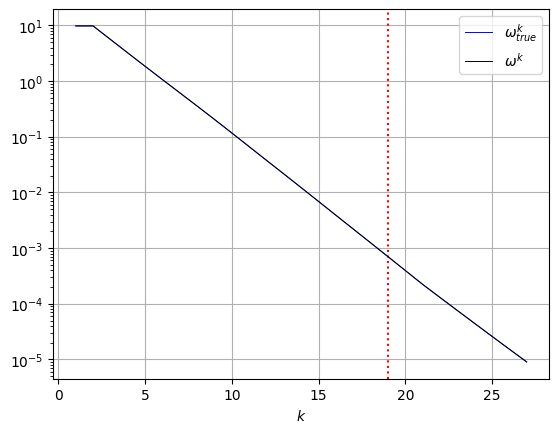

In [7]:
ob.plot_true_abs_gap_uk(lk=prob.lower_bnd, uk=prob.upper_bnd, h_true=h_cvx)